In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import math 

In [2]:
iris = load_iris()

In [3]:
df_data = pd.DataFrame(iris.data)

In [4]:
df_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df_data.drop(columns=[2,3], inplace= True)
df_data.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
df_target = pd.DataFrame(iris.target)

In [7]:
df_data.rename(columns= {0:"sepal_length", 1:"sepal_width"}, inplace = True)
df_data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
df_iris = pd.concat([df_data, df_target],ignore_index= False, axis= 1)

In [9]:
df_iris.rename(columns={0:"y"}, inplace = True)

In [10]:
df_iris["y"].value_counts()

2    50
1    50
0    50
Name: y, dtype: int64

In [11]:
df_iris['y'].unique()

array([0, 1, 2])

In [12]:
classes = ['Setosa' , 'Versicolor' , 'Virginica']

Text(0, 0.5, 'likelhood')

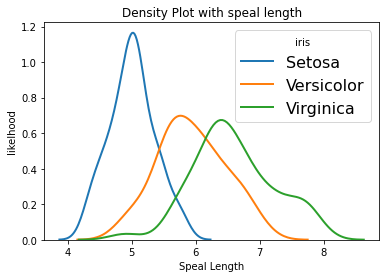

In [13]:
for c in df_iris['y'].unique():
    subset=df_iris[df_iris.y==c]
    sns.distplot(subset['sepal_length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = classes[c])
    
   
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'iris')
plt.title('Density Plot with speal length')
plt.xlabel('Speal Length')
plt.ylabel("likelhood")

In [14]:
df_iris_0 = df_iris[df_iris["y"] == 0]
df_iris_1 = df_iris[df_iris["y"] == 1]
df_iris_2 = df_iris[df_iris["y"] == 2]
df_iris_0.sort_values("sepal_length", ascending = True, inplace = True)
df_iris_1.sort_values("sepal_length", ascending = True, inplace = True)
df_iris_2.sort_values("sepal_length", ascending = True, inplace = True)
df_iris_1.head()

<ipython-input-14-500558da796a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris_0.sort_values("sepal_length", ascending = True, inplace = True)
<ipython-input-14-500558da796a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris_1.sort_values("sepal_length", ascending = True, inplace = True)
<ipython-input-14-500558da796a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris_2.sort_values("sepal_length", ascending = Tr

,sepal_length,sepal_width,y
57,4.9,2.4,1
60,5.0,2.0,1
93,5.0,2.3,1
98,5.1,2.5,1
59,5.2,2.7,1


In [15]:
mean_0 = np.mean(df_iris_0["sepal_length"])
mean_1 = np.mean(df_iris_1["sepal_length"])
mean_2 = np.mean(df_iris_2["sepal_length"])
mean_length = [mean_0, mean_1, mean_2]
mean_3 = np.mean(df_iris_0["sepal_width"])
mean_4 = np.mean(df_iris_1["sepal_width"])
mean_5 = np.mean(df_iris_2["sepal_width"])
mean_length = [mean_3, mean_4, mean_5]


In [16]:
var_0 = np.std(df_iris_0["sepal_length"])
var_1 = np.std(df_iris_1["sepal_length"])
var_2 = np.std(df_iris_2["sepal_length"])
std = [var_0, var_1, var_2]
var_3= np.std(df_iris_0["sepal_width"])
var_4= np.std(df_iris_1["sepal_width"])
var_5= np.std(df_iris_2["sepal_width"])
std = [var_3, var_4, var_5]



In [17]:
def likelihood(feature,mean,variance):
    likelhood = []
    for x in feature:
        first = 1/math.sqrt(2*math.pi*(variance**2))
        second = math.exp(-((x - mean)*2)/2*variance*2)
        prob_likelihood = first * second
        likelhood.append(prob_likelihood)
    return likelhood

In [18]:
def likelyhood2(X,mean,sigma):
        likelhood = []
        for x in X:
            prob_likelihood =  np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))
            likelhood.append(prob_likelihood)
        return likelhood

In [19]:
x_values  = np.linspace(df_iris["sepal_length"].min() - 1,df_iris["sepal_length"].max()+1,99)

In [20]:
class_0_likelhood_length = likelyhood2(x_values, mean_0, var_0)
class_1_likelhood_length = likelyhood2(x_values, mean_1, var_1)
class_2_likelhood_length = likelyhood2(x_values, mean_2, var_2)
class_0_likelhood_width = likelyhood2(x_values, mean_3, var_3)
class_1_likelhood_width = likelyhood2(x_values, mean_4, var_4)
class_2_likelhood_width = likelyhood2(x_values, mean_5, var_5)


In [21]:
class_0likelyhood = np.array(class_0_likelhood_length) * np.array(class_0_likelhood_width)
class_1likelyhood = np.array(class_1_likelhood_length) * np.array(class_1_likelhood_width)
class_2likelyhood = np.array(class_2_likelhood_length) * np.array(class_2_likelhood_width)
len(class_0likelyhood)

99

In [22]:
class_0_likelhood2 = likelyhood2(x_values,mean_0, var_0)
class_1_likelhood2 = likelyhood2(x_values,mean_1, var_1)
class_2_likelhood2 = likelyhood2(x_values,mean_2, var_2)

            

***Drawing the normal likelyhood of the featuers***

In [23]:
def likelyhood2(x,mean,sigma):
                return np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))

**Making the graph genarlizing more with more datapoints***

No handles with labels found to put in legend.


Text(0, 0.5, 'likelhood')

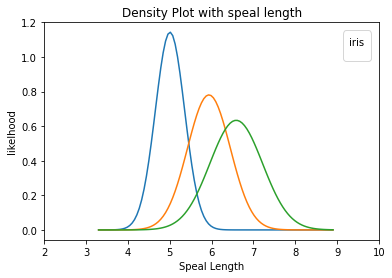

In [24]:
classes = ['Setosa' , 'Versicolor' , 'Virginica']
# i=0
# for c in class_likelhood:
#     #subset=df_iris[df_iris.y==c]
#     plot()
#     sns.distplot(c, hist = False, kde = True,kde_kws = {'linewidth': 2},
#     label = classes[i])
#     i+=1

plt.plot(x_values,class_0_likelhood2) 
plt.plot(x_values,class_1_likelhood2)   
plt.plot(x_values,class_2_likelhood2)   
        
# Plot formatting
plt.legend(prop={'size': 16}, title = 'iris')
plt.title('Density Plot with speal length')
plt.xlabel('Speal Length')
plt.xlim(2, 10) 
plt.ylabel("likelhood")


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train = df_data
y_train = df_iris["y"]
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_train)
predictions  = gnb.predict_proba(X_train)
predictions_0 = predictions[:,0]
predictions_1 = predictions[:,1]
predictions_2 = predictions[:,2]


In [26]:
df_iris["posterior_0"] = predictions_0
df_iris["posterior_1"] = predictions_1
df_iris["posterior_2"] = predictions_2

In [27]:
predictions

array([[9.75339299e-01, 1.40908607e-02, 1.05698407e-02],
       [8.35457338e-01, 1.34652419e-01, 2.98902435e-02],
       [9.61569823e-01, 2.88381395e-02, 9.59203791e-03],
       [9.46784877e-01, 4.19824403e-02, 1.12326824e-02],
       [9.90867352e-01, 4.77887679e-03, 4.35377169e-03],
       [9.90606202e-01, 2.63301578e-03, 6.76078195e-03],
       [9.89679764e-01, 6.75386357e-03, 3.56637206e-03],
       [9.70023175e-01, 1.91755701e-02, 1.08012547e-02],
       [8.93973409e-01, 8.96215717e-02, 1.64050194e-02],
       [8.94789272e-01, 8.24931198e-02, 2.27176081e-02],
       [9.67493766e-01, 1.28184782e-02, 1.96877558e-02],
       [9.83967906e-01, 1.04694779e-02, 5.56261558e-03],
       [8.71770067e-01, 1.05365332e-01, 2.28646004e-02],
       [9.36022878e-01, 5.17750132e-02, 1.22021091e-02],
       [9.21013610e-01, 1.22955729e-02, 6.66908175e-02],
       [9.97525456e-01, 1.60776451e-04, 2.31376755e-03],
       [9.90606202e-01, 2.63301578e-03, 6.76078195e-03],
       [9.75339299e-01, 1.40908

In [28]:
posterior_each_class = np.argmax(predictions, axis=1)
posterior_each_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

Text(0, 0.5, 'Posterior Probability')

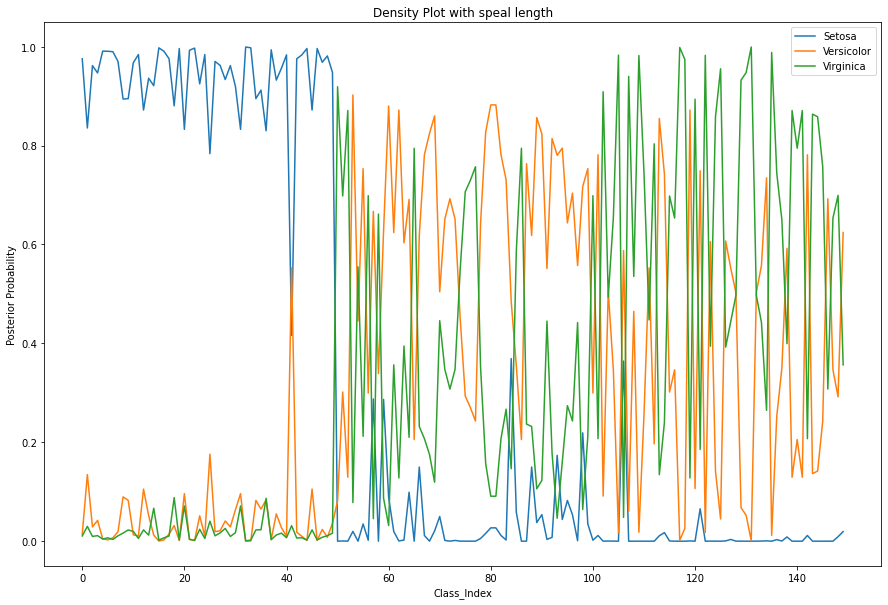

In [59]:
plt.figure(figsize=(15,10))

plt.plot(predictions_0)
plt.plot(predictions_1)
plt.plot(predictions_2)        
# Plot formatting
plt.legend(['Setosa' , 'Versicolor' , 'Virginica'])
plt.title('Density Plot with speal length')
plt.xlabel('Class_Index')
plt.ylabel("Posterior Probability")


In [30]:
df_sorted_1.head()

,sepal_length,posterior_0
13,4.3,0.936023
42,4.4,0.975304
38,4.4,0.932291
8,4.4,0.893973
41,4.5,0.416182


In [31]:
from sklearn.metrics import classification_report , confusion_matrix

In [32]:
print(classification_report(y_pred , df_iris["y"]))
print(confusion_matrix(y_pred , df_iris["y"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.74      0.65      0.69        57
           2       0.62      0.70      0.66        44

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150

[[49  0  0]
 [ 1 37 19]
 [ 0 13 31]]


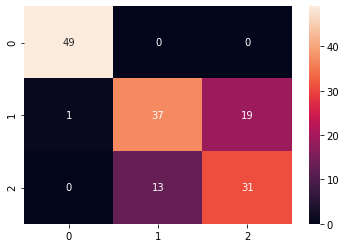

In [61]:
sns.heatmap(confusion_matrix(y_pred , df_target), annot=True)

In [33]:
def plotData(classes):
    colors = ['r', 'b', 'g']
    markers = ['o', '*', '+']
    for class_index in range(0,len(classes)):
        if class_index == 0:
            plt.scatter(df_iris_0["sepal_length"],
                        df_iris_0["sepal_width"], c=colors[0], marker=markers[0],
        label=classes[0])
        elif class_index == 1:
            plt.scatter(df_iris_1["sepal_length"],
                        df_iris_2["sepal_width"], c=colors[1], marker=markers[1],
        label=classes[0])
        elif class_index == 2:
            plt.scatter(df_iris_2["sepal_length"],
                        df_iris_2["sepal_width"], c=colors[2], marker=markers[2],
        label=classes[class_index])
    Title = "Iris Dataset with {n} classes" .format(n=int(len(classes)))
    plt.title(Title)
    plt.xlabel('Petal Length (cm)' )
    plt.ylabel('Petal width (cm)' )
    plt.legend()


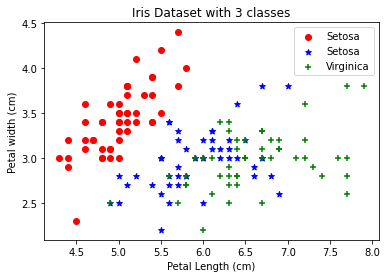

In [34]:
plotData(classes)

## No.4 number 1

In [35]:
class_0_likelhood2_4 = likelyhood2(x_values,5.5, var_0)
class_1_likelhood2_4 = likelyhood2(x_values,5.5, var_1)
class_2_likelhood2_4 = likelyhood2(x_values,5.5, var_2)

No handles with labels found to put in legend.


Text(0, 0.5, 'likelhood')

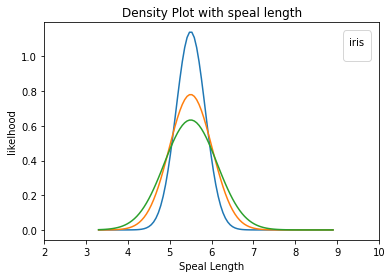

In [36]:
classes = ['Setosa' , 'Versicolor' , 'Virginica']
# i=0
# for c in class_likelhood:
#     #subset=df_iris[df_iris.y==c]
#     plot()
#     sns.distplot(c, hist = False, kde = True,kde_kws = {'linewidth': 2},
#     label = classes[i])
#     i+=1

plt.plot(x_values,class_0_likelhood2_4) 
plt.plot(x_values,class_1_likelhood2_4)   
plt.plot(x_values,class_2_likelhood2_4)   
        
# Plot formatting
plt.legend(prop={'size': 16}, title = 'iris')
plt.title('Density Plot with speal length')
plt.xlabel('Speal Length')
plt.xlim(2, 10) 
plt.ylabel("likelhood")


In [37]:
class_0_likelhood2_5 = likelyhood2(x_values,mean_0, 0.26)
class_1_likelhood2_5 = likelyhood2(x_values,mean_1, 0.26)
class_2_likelhood2_5 = likelyhood2(x_values,mean_2, 0.26)


No handles with labels found to put in legend.


(2.0, 10.0)

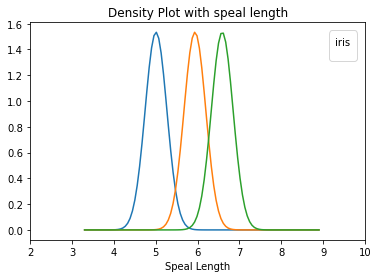

In [38]:
classes = ['Setosa' , 'Versicolor' , 'Virginica']
# i=0
# for c in class_likelhood:
#     #subset=df_iris[df_iris.y==c]
#     plot()
#     sns.distplot(c, hist = False, kde = True,kde_kws = {'linewidth': 2},
#     label = classes[i])
#     i+=1

plt.plot(x_values,class_0_likelhood2_5) 
plt.plot(x_values,class_1_likelhood2_5)   
plt.plot(x_values,class_2_likelhood2_5)   
        
# Plot formatting
plt.legend(prop={'size': 16}, title = 'iris')
plt.title('Density Plot with speal length')
plt.xlabel('Speal Length')
plt.xlim(2, 10) 

In [39]:
likelhood0_5 = likelyhood2(df_iris_0["sepal_length"],mean_0, 0.26)
likelhood1_5 = likelyhood2(df_iris_1["sepal_length"],mean_1, 0.26)
likelhood2_5 = likelyhood2(df_iris_2["sepal_length"],mean_2, 0.26)
liklyhood_new = likelhood0_5 + likelhood1_5 + likelhood2_5


## Changing the Variance and Claculating the Accuracy

In [63]:
gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_pred = gnb1.predict(X_train)
gnb.sigma_[:,0] = [0.26,0.26,0.26]
y_pred1 = gnb1.predict(X_train)
print(classification_report(y_pred1 , df_iris["y"]))

predictions2  = gnb1.predict_proba(X_train)
predictions_01 = predictions2[:,0]
predictions_11 = predictions2[:,1]
predictions_21 = predictions2[:,2]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.74      0.65      0.69        57
           2       0.62      0.70      0.66        44

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150



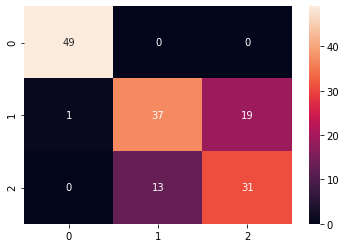

In [62]:
sns.heatmap(confusion_matrix(y_pred1, df_target), annot=True)

Text(0, 0.5, 'Posterior Probability')

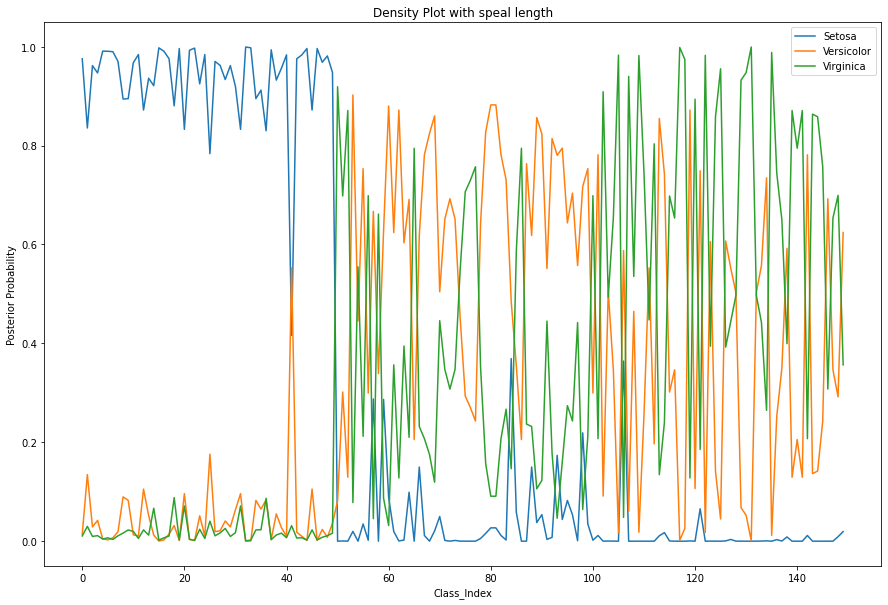

In [58]:

plt.figure(figsize=(15,10))

plt.plot(predictions_01) 
plt.plot(predictions_11)    
plt.plot(predictions_21) 

        
# Plot formatting
#plt.legend(prop={'size': 16}, title = 'iris')
plt.legend(['Setosa' , 'Versicolor' , 'Virginica'])
plt.title('Density Plot with speal length')
plt.xlabel('Class_Index') 
plt.ylabel("Posterior Probability")


In [65]:
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
y_pred = gnb2.predict(X_train)
gnb2.theta_[:,0] = [5.5 ,5.5 ,5.5]
y_pred2 = gnb2.predict(X_train)
predictions3  = gnb2.predict_proba(X_train)
#gnb.fit(X_train, y_train)
print(classification_report(y_pred2 , df_iris["y"]))


              precision    recall  f1-score   support

           0       0.58      0.94      0.72        31
           1       0.56      0.67      0.61        42
           2       0.74      0.48      0.58        77

    accuracy                           0.63       150
   macro avg       0.63      0.69      0.64       150
weighted avg       0.66      0.63      0.62       150



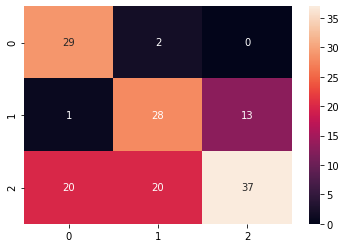

In [64]:
sns.heatmap(confusion_matrix(y_pred2 , df_target), annot=True)

In [44]:
predictions_03 = predictions3[:,0]
predictions_13 = predictions3[:,1]
predictions_23 = predictions3[:,2]

Text(0, 0.5, 'Posterior Probability')

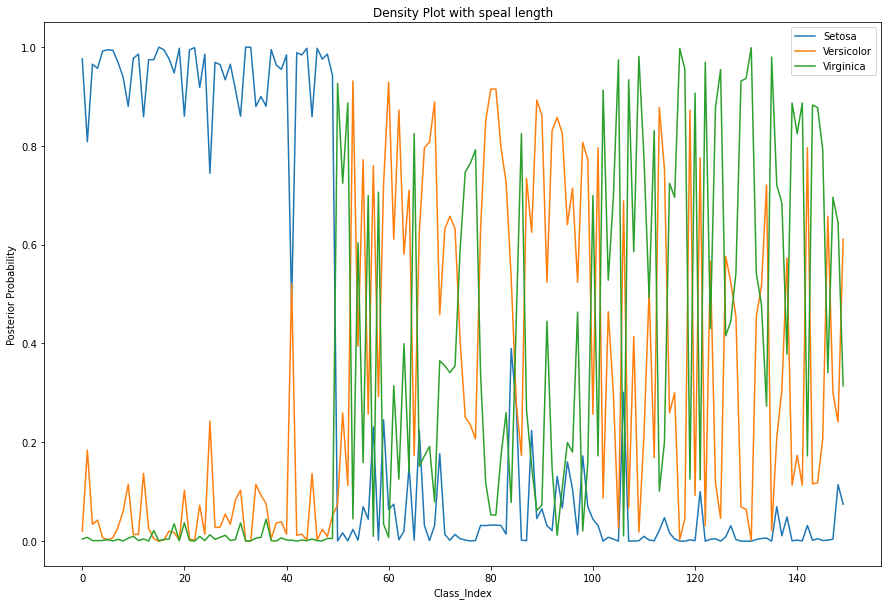

In [57]:

plt.figure(figsize=(15,10))

plt.plot(predictions_03) 
plt.plot(predictions_13)    
plt.plot(predictions_23) 

        
# Plot formatting
#plt.legend(prop={'size': 16}, title = 'iris')
plt.legend(['Setosa' , 'Versicolor' , 'Virginica'])
plt.title('Density Plot with speal length')
plt.xlabel('Class_Index') 
plt.ylabel("Posterior Probability")
